In [1]:
import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')
import warnings
warnings.filterwarnings('ignore')

from obstacle_avoidance_processing import AvoidanceProcessing


Loading DLC 2.2.3...


In [2]:
# metadata json path
metadata_path = r'C:\Users\nlab\obstacle_avoidance\metadata\oa_metadata.json'

#C:\Users\nlab\Desktop\mike_bonsai\recordings\metadata
# task name
# 'oa' for object avoidance
# 'gd' for gap detection
task_name = 'oa'

In [3]:
session = AvoidanceProcessing(metadata_path, task=task_name) 

In [4]:
session.change_dlc_project(r'C:\Users\nlab\obstacle_avoidance\deeplabcut\obstacle_avoidance_100522-mike-2022-10-05\config.yaml')
session.dlc_project

'C:\\Users\\nlab\\obstacle_avoidance\\deeplabcut\\obstacle_avoidance_100522-mike-2022-10-05\\config.yaml'

In [5]:
session.preprocess()

using light network
Using snapshot-750000 for model C:\Users\nlab\obstacle_avoidance\deeplabcut\obstacle_avoidance_100522-mike-2022-10-05\dlc-models\iteration-0\object_avoidanceoct22-trainset95shuffle1
Starting to analyze %  C:/Users/nlab/obstacle_avoidance/recordings\100322\J19LT\oa\100322_J19LT_control_Rig2_oa_top1.avi
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


100%|██████████| 33075/33075 [00:30<00:00, 1078.58it/s]


In [5]:
session.process()


0it [00:00, ?it/s]

42
df made


1it [00:03,  3.65s/it]


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
df = pd.read_hdf(r'C:\Users\nlab\obstacle_avoidance\recordings\100322\J19LT\oa\raw_J19LT_100322_oa.h5')  
df['odd'] = np.nan
for i, ind in enumerate(df.index.values):
    if ind%2 == 0: # odd values
        df.at[ind, 'odd'] = True
    elif ind%2 == 1:
        df.at[ind, 'odd'] = False

dist_to_posts = np.median(df['arenaTR_x'].iloc[0],0) - np.median(df['arenaTL_x'].iloc[0],0)
pxl2cm= dist_to_posts/48.26
x_cols = [i for i in df.columns.values if '_x' in i]
y_cols = [i for i in df.columns.values if '_y' in i]
for i in range(len(x_cols)):
    df[x_cols[i]+'_cm'] = df.loc[:,x_cols[i]] / pxl2cm
    df[y_cols[i]+'_cm'] = df.loc[:,y_cols[i]] / pxl2cm

In [124]:
for ind, row in df.iterrows():
    xvals = np.stack([row['obstacleTL_x_cm'], row['obstacleTR_x_cm'], row['obstacleBL_x_cm'], row['obstacleBR_x_cm']]).astype(float)
    xvals_cm = np.stack([row['obstacleTL_x_cm'], row['obstacleTR_x_cm'], row['obstacleBL_x_cm'], row['obstacleBR_x_cm']]).astype(float)
    df.at[ind,'obstacle_x'] = np.nanmean(xvals)
    df.at[ind,'obstacle_x_cm'] = np.nanmean(xvals_cm)
    #df.at[ind,'obstacle_x_std'] = np.mean(np.nanstd(xvals, axis=1))
    yvals = np.stack([row['obstacleTL_y_cm'], row['obstacleTR_y_cm'], row['obstacleBL_y_cm'], row['obstacleBR_y_cm']]).astype(float)
    yvals_cm = np.stack([row['obstacleTL_y_cm'], row['obstacleTR_y_cm'], row['obstacleBL_y_cm'], row['obstacleBR_y_cm']]).astype(float)
    df.at[ind, 'obstacle_y'] = np.nanmean(yvals)
    df.at[ind, 'obstacle_y_cm'] = np.nanmean(yvals_cm)
    #df.at[ind, 'obstacle_y_std'] = np.mean(np.nanstd(yvals, axis=1))

In [ ]:
for ind, row in self.data.iterrows():
    xvals = np.stack([row['obstacleTL_x_cm'], row['obstacleTR_x_cm'], row['obstacleBL_x_cm'], row['obstacleBR_x_cm']]).astype(float)
    xvals_cm = np.stack([row['obstacleTL_x_cm'], row['obstacleTR_x_cm'], row['obstacleBL_x_cm'], row['obstacleBR_x_cm']]).astype(float)
    self.data.at[ind,'obstacle_x'] = np.nanmean(xvals)
    self.data.at[ind,'obstacle_x_cm'] = np.nanmean(xvals_cm)
    self.data.at[ind,'obstacle_x_std'] = np.mean(np.nanstd(xvals, axis=1))
    yvals = np.stack([row['obstacleTL_y_cm'], row['obstacleTR_y_cm'], row['obstacleBL_y_cm'], row['obstacleBR_y_cm']]).astype(float)
    yvals_cm = np.stack([row['obstacleTL_y_cm'], row['obstacleTR_y_cm'], row['obstacleBL_y_cm'], row['obstacleBR_y_cm']]).astype(float)
    self.data.at[ind, 'obstacle_y'] = np.nanmean(yvals)
    self.data.at[ind, 'obstacle_y_cm'] = np.nanmean(yvals_cm)
    self.data.at[ind, 'obstacle_y_std'] = np.mean(np.nanstd(yvals, axis=1))

In [38]:
import matplotlib.pyplot as plt

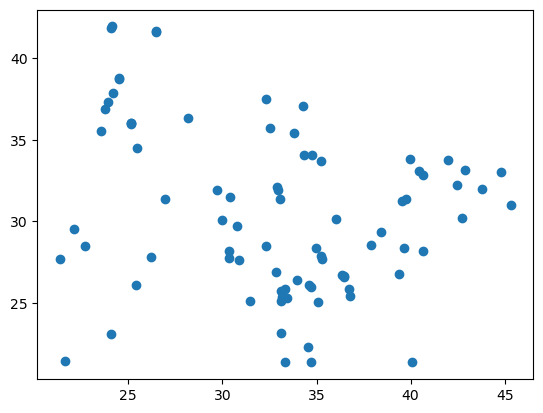

In [63]:
plt.scatter(df['obstacle_x_cm'],df['obstacle_y_cm'])

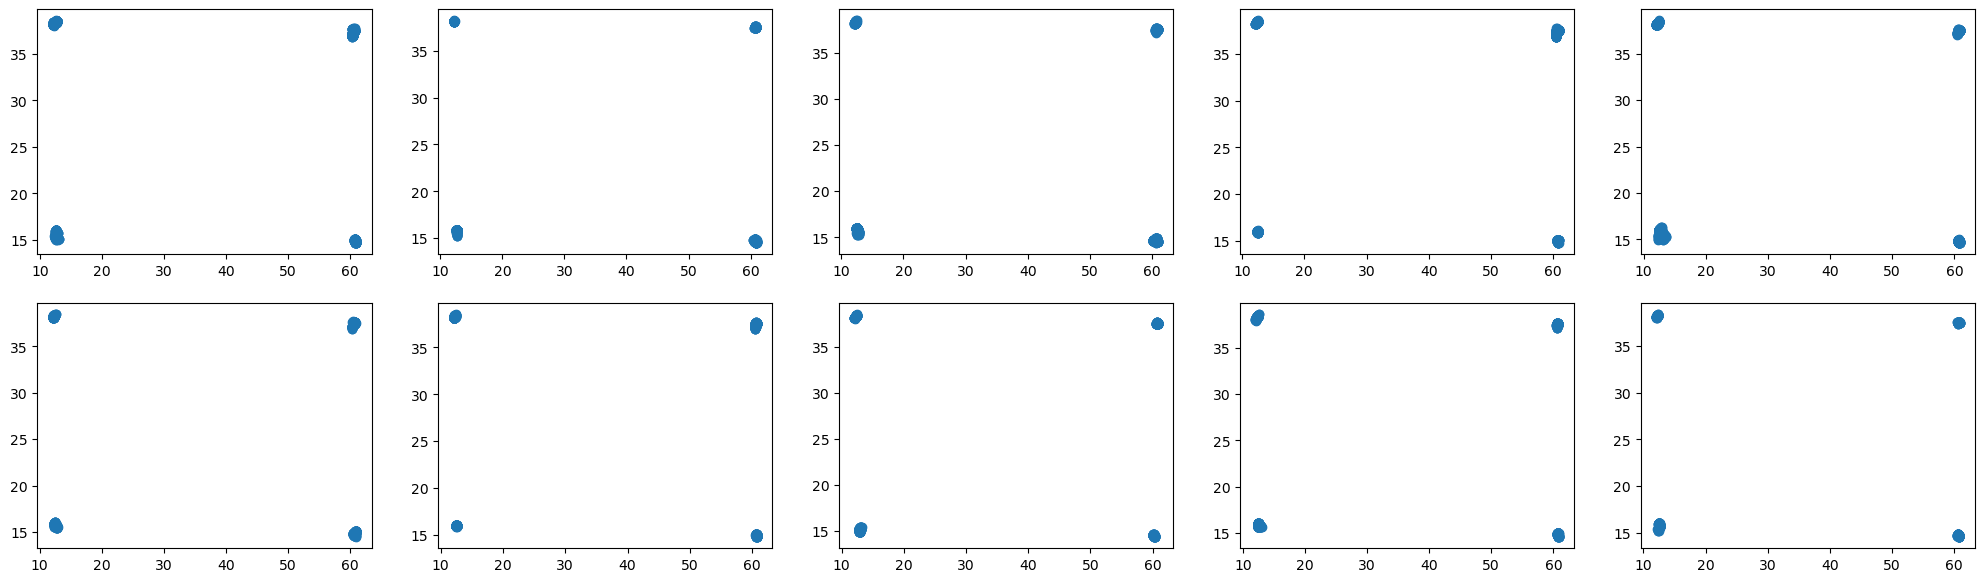

In [48]:
test = df.sample(10)
test=test.reset_index()
plt.subplots(2,5, figsize=(25,7)) 
for ind, row in test.iterrows():
    plt.subplot(2,5,ind +1)
    plt.scatter([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBL_x_cm'], row['arenaBR_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBL_y_cm'], row['arenaBR_y_cm']])

In [118]:
arena_cols = [col for col in test.columns if 'arena' in col]

In [125]:
test = df.sample(10)
#test = test.drop(test.filter(regex='likelihood').columns,axis = 1)
test = test.reset_index()


In [126]:
arena_cols = [col for col in test.columns if 'arena' in col]
obstacle_cols = [col for col in test.columns if 'obstacle' in col]

In [127]:
arena_cols

['arenaTL_x',
 'arenaTL_y',
 'arenaTL_likelihood',
 'arenaTR_x',
 'arenaTR_y',
 'arenaTR_likelihood',
 'arenaBL_x',
 'arenaBL_y',
 'arenaBL_likelihood',
 'arenaBR_x',
 'arenaBR_y',
 'arenaBR_likelihood',
 'arenaTL_x_cm',
 'arenaTL_y_cm',
 'arenaTR_x_cm',
 'arenaTR_y_cm',
 'arenaBL_x_cm',
 'arenaBL_y_cm',
 'arenaBR_x_cm',
 'arenaBR_y_cm']

In [128]:
obstacle_cols

['obstacleTL_x',
 'obstacleTL_y',
 'obstacleTL_likelihood',
 'obstacleTR_x',
 'obstacleTR_y',
 'obstacleTR_likelihood',
 'obstacleBR_x',
 'obstacleBR_y',
 'obstacleBR_likelihood',
 'obstacleBL_x',
 'obstacleBL_y',
 'obstacleBL_likelihood',
 'obstacleTL_x_cm',
 'obstacleTL_y_cm',
 'obstacleTR_x_cm',
 'obstacleTR_y_cm',
 'obstacleBR_x_cm',
 'obstacleBR_y_cm',
 'obstacleBL_x_cm',
 'obstacleBL_y_cm',
 'obstacle_x',
 'obstacle_x_cm',
 'obstacle_x_std',
 'obstacle_y',
 'obstacle_y_cm',
 'obstacle_y_std']

In [78]:
arena_cols

['arenaTL_x',
 'arenaTL_y',
 'arenaTR_x',
 'arenaTR_y',
 'arenaBL_x',
 'arenaBL_y',
 'arenaBR_x',
 'arenaBR_y',
 'arenaTL_x_cm',
 'arenaTL_y_cm',
 'arenaTR_x_cm',
 'arenaTR_y_cm',
 'arenaBL_x_cm',
 'arenaBL_y_cm',
 'arenaBR_x_cm',
 'arenaBR_y_cm']

In [79]:
## take last index of obstacle and arena
arena_cols = [col for col in test.columns if 'arena' in col]
for col in arena_cols:
    for ind,row in test.iterrows():
        test.at[ind,col+'_li'] = row[col][np.isfinite(row[col].astype(float))][-1]
        test.at[ind,col+'_fi'] = row[col][np.isfinite(row[col].astype(float))][0]  


obstacle_cols = [col for col in test.columns if 'obstacle' in col]
for col in obstacle_cols:
    for ind,row in test.iterrows():
        test.at[ind,col+'_li'] = row[col][np.isfinite(row[col].astype(float))][-1]
        test.at[ind,col+'_fi'] = row[col][np.isfinite(row[col].astype(float))][0] 


In [107]:
arena_cols = [col for col in test.columns if 'arena' in col]

In [108]:
arena_cols

['arenaTL_x',
 'arenaTL_y',
 'arenaTR_x',
 'arenaTR_y',
 'arenaBL_x',
 'arenaBL_y',
 'arenaBR_x',
 'arenaBR_y',
 'arenaTL_x_cm',
 'arenaTL_y_cm',
 'arenaTR_x_cm',
 'arenaTR_y_cm',
 'arenaBL_x_cm',
 'arenaBL_y_cm',
 'arenaBR_x_cm',
 'arenaBR_y_cm']

In [80]:
obstacle_cols = [col for col in test.columns if 'obstacle' in col]
del obstacle_cols[-6:]

In [110]:
df.columns.values

array(['first_poke', 'second_poke', 'trial_timestamps', 'trial_vidframes',
       'nose_x', 'nose_y', 'nose_likelihood', 'leftear_x', 'leftear_y',
       'leftear_likelihood', 'rightear_x', 'rightear_y',
       'rightear_likelihood', 'spine_x', 'spine_y', 'spine_likelihood',
       'midspine_x', 'midspine_y', 'midspine_likelihood', 'tailbase_x',
       'tailbase_y', 'tailbase_likelihood', 'midtail_x', 'midtail_y',
       'midtail_likelihood', 'tailend_x', 'tailend_y',
       'tailend_likelihood', 'arenaTL_x', 'arenaTL_y',
       'arenaTL_likelihood', 'arenaTR_x', 'arenaTR_y',
       'arenaTR_likelihood', 'arenaBL_x', 'arenaBL_y',
       'arenaBL_likelihood', 'arenaBR_x', 'arenaBR_y',
       'arenaBR_likelihood', 'obstacleTL_x', 'obstacleTL_y',
       'obstacleTL_likelihood', 'obstacleTR_x', 'obstacleTR_y',
       'obstacleTR_likelihood', 'obstacleBR_x', 'obstacleBR_y',
       'obstacleBR_likelihood', 'obstacleBL_x', 'obstacleBL_y',
       'obstacleBL_likelihood', 'leftportT_x', 'leftpo

In [82]:
for col in obstacle_cols:
    for ind,row in test.iterrows():
        test.at[ind,col] = row[col][np.isfinite(row[col].astype(float))][-1] 

In [73]:
test

,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,...,rightportT_x_cm,rightportT_y_cm,rightportB_x_cm,rightportB_y_cm,obstacle_x,obstacle_x_cm,obstacle_x_std,obstacle_y,obstacle_y_cm,obstacle_y_std
0,52,63505.011712,63520.524620,"[63505.019686, 63505.036108, 63505.052774, 635...","[18420, 18421, 18422, 18423, 18424, 18425, 184...","[114.86739349365234, 115.15232849121094, 114.5...","[265.1737365722656, 264.5727233886719, 265.327...","[132.2296142578125, 132.04318237304688, 131.56...","[264.931640625, 264.8052673339844, 265.3870849...","[128.26657104492188, 128.45938110351562, 128.0...",...,"[61.69410873321727, 61.6417876547938, 61.71201...","[26.654649612824908, 26.665233050989386, 26.71...","[60.63674215021022, 60.69263338813762, 60.5604...","[26.534703980294143, 26.601559777427962, 26.63...",34.300393,34.300393,0.764463,37.063611,37.063611,2.159554
1,55,63537.848000,63544.279436,"[63537.864243, 63537.881459, 63537.897433, 635...","[[20390, 20391, 20392, 20393, 20394, 20395, 20...","[570.2232055664062, 569.9671630859375, 570.802...","[258.0972900390625, 258.2244873046875, 258.113...","[557.015869140625, 556.9907836914062, 557.0140...","[246.8000030517578, 247.10902404785156, 247.17...","[550.3031005859375, 550.3987426757812, 550.884...",...,"[61.67984112498076, 61.64324699006548, 61.6718...","[26.79452755010435, 26.78338546015618, 26.7576...","[60.63146508962959, 60.63878782554641, 60.7036...","[26.78355973345313, 26.765006956578464, 26.763...",30.349744,30.349744,4.873094,28.155580,28.155580,5.008681
2,1,63229.835737,63233.886988,"[63229.841587, 63229.857971, 63229.874572, 632...","[[1915, 1916, 1917, 1918, 1919, 1920, 1921, 19...","[569.733154296875, 569.970703125, 569.74591064...","[257.3892822265625, 257.12530517578125, 257.15...","[557.7861328125, 558.2794189453125, 558.036621...","[244.46926879882812, 244.72145080566406, 244.5...","[548.0977783203125, 548.9324951171875, 548.731...",...,"[61.73429257230531, 61.69051902904452, 61.6911...","[26.76478219288707, 26.726091892241147, 26.711...","[60.578727058271355, 60.6297712183321, 60.5898...","[26.75554570814857, 26.709415403572923, 26.709...",30.779012,30.779012,4.425388,29.719773,29.719773,6.136085
3,65,63595.254105,63603.069977,"[63595.267737, 63595.283814, 63595.300723, 635...","[[23833, 23834, 23835, 23836, 23837, 23838, 23...","[569.0010375976562, 569.2662963867188, 569.599...","[259.0525207519531, 259.1631774902344, 259.335...","[558.9092407226562, 558.7410888671875, 558.640...","[246.99937438964844, 247.15557861328125, 247.6...","[550.5185546875, 550.381591796875, 550.6304931...",...,"[61.64352061542892, 61.65834850417152, 61.6454...","[26.755498475198927, 26.758804781673827, 26.77...","[60.60429148508417, 60.5860823686362, 60.64927...","[26.74869204428336, 26.799293191850925, 26.811...",33.086297,33.086297,0.584331,25.102378,25.102378,4.075984
4,5,63253.692748,63258.067686,"[63253.699276, 63253.716531, 63253.73271, 6325...","[[3346, 3347, 3348, 3349, 3350, 3351, 3352, 33...","[567.7761840820312, 567.9352416992188, 567.834...","[260.19580078125, 259.65631103515625, 259.8600...","[555.2067260742188, 554.922119140625, 552.5525...","[248.92391967773438, 249.0541534423828, 250.78...","[554.1431274414062, 554.2879028320312, 555.561...",...,"[61.678440423715536, 61.6587850017751, 61.6080...","[26.857150297716853, 26.823502521625752, 26.78...","[60.30430036340994, 60.27462504125593, 60.2010...","[26.893094572393967, 26.833173875245432, 26.81...",29.960343,29.960343,4.697552,30.066873,30.066873,8.439652
5,82,63713.642726,63729.483276,"[63713.658316, 63713.67552, 63713.691532, 6371...","[30934, 30935, 30936, 30937, 30938, 30939, 309...","[114.87150573730469, 115.12166595458984, 115.1...","[265.4710998535156, 265.64697265625, 265.12710...","[129.72698974609375, 129.799072265625, 129.397...","[273.8226013183594, 274.01800537109375, 273.70...","[130.35093688964844, 130.2404022216797, 130.03...",...,"[61.885236049580044, 

In [105]:
test = df.sample(30)
test = test.drop(test.filter(regex='likelihood').columns,axis = 1)
test = test.reset_index()

## take last index of obstacle and arena
arena_cols = [col for col in test.columns if 'arena' in col]
for col in arena_cols:
    for ind,row in test.iterrows():
        test.at[ind,col] = row[col][np.isfinite(row[col].astype(float))][-1] 


obstacle_cols = [col for col in test.columns if 'obstacle' in col]
del obstacle_cols[-6:]
for col in obstacle_cols:
    for ind,row in test.iterrows():
        test.at[ind,col] = row[col][np.isfinite(row[col].astype(float))][-1] 



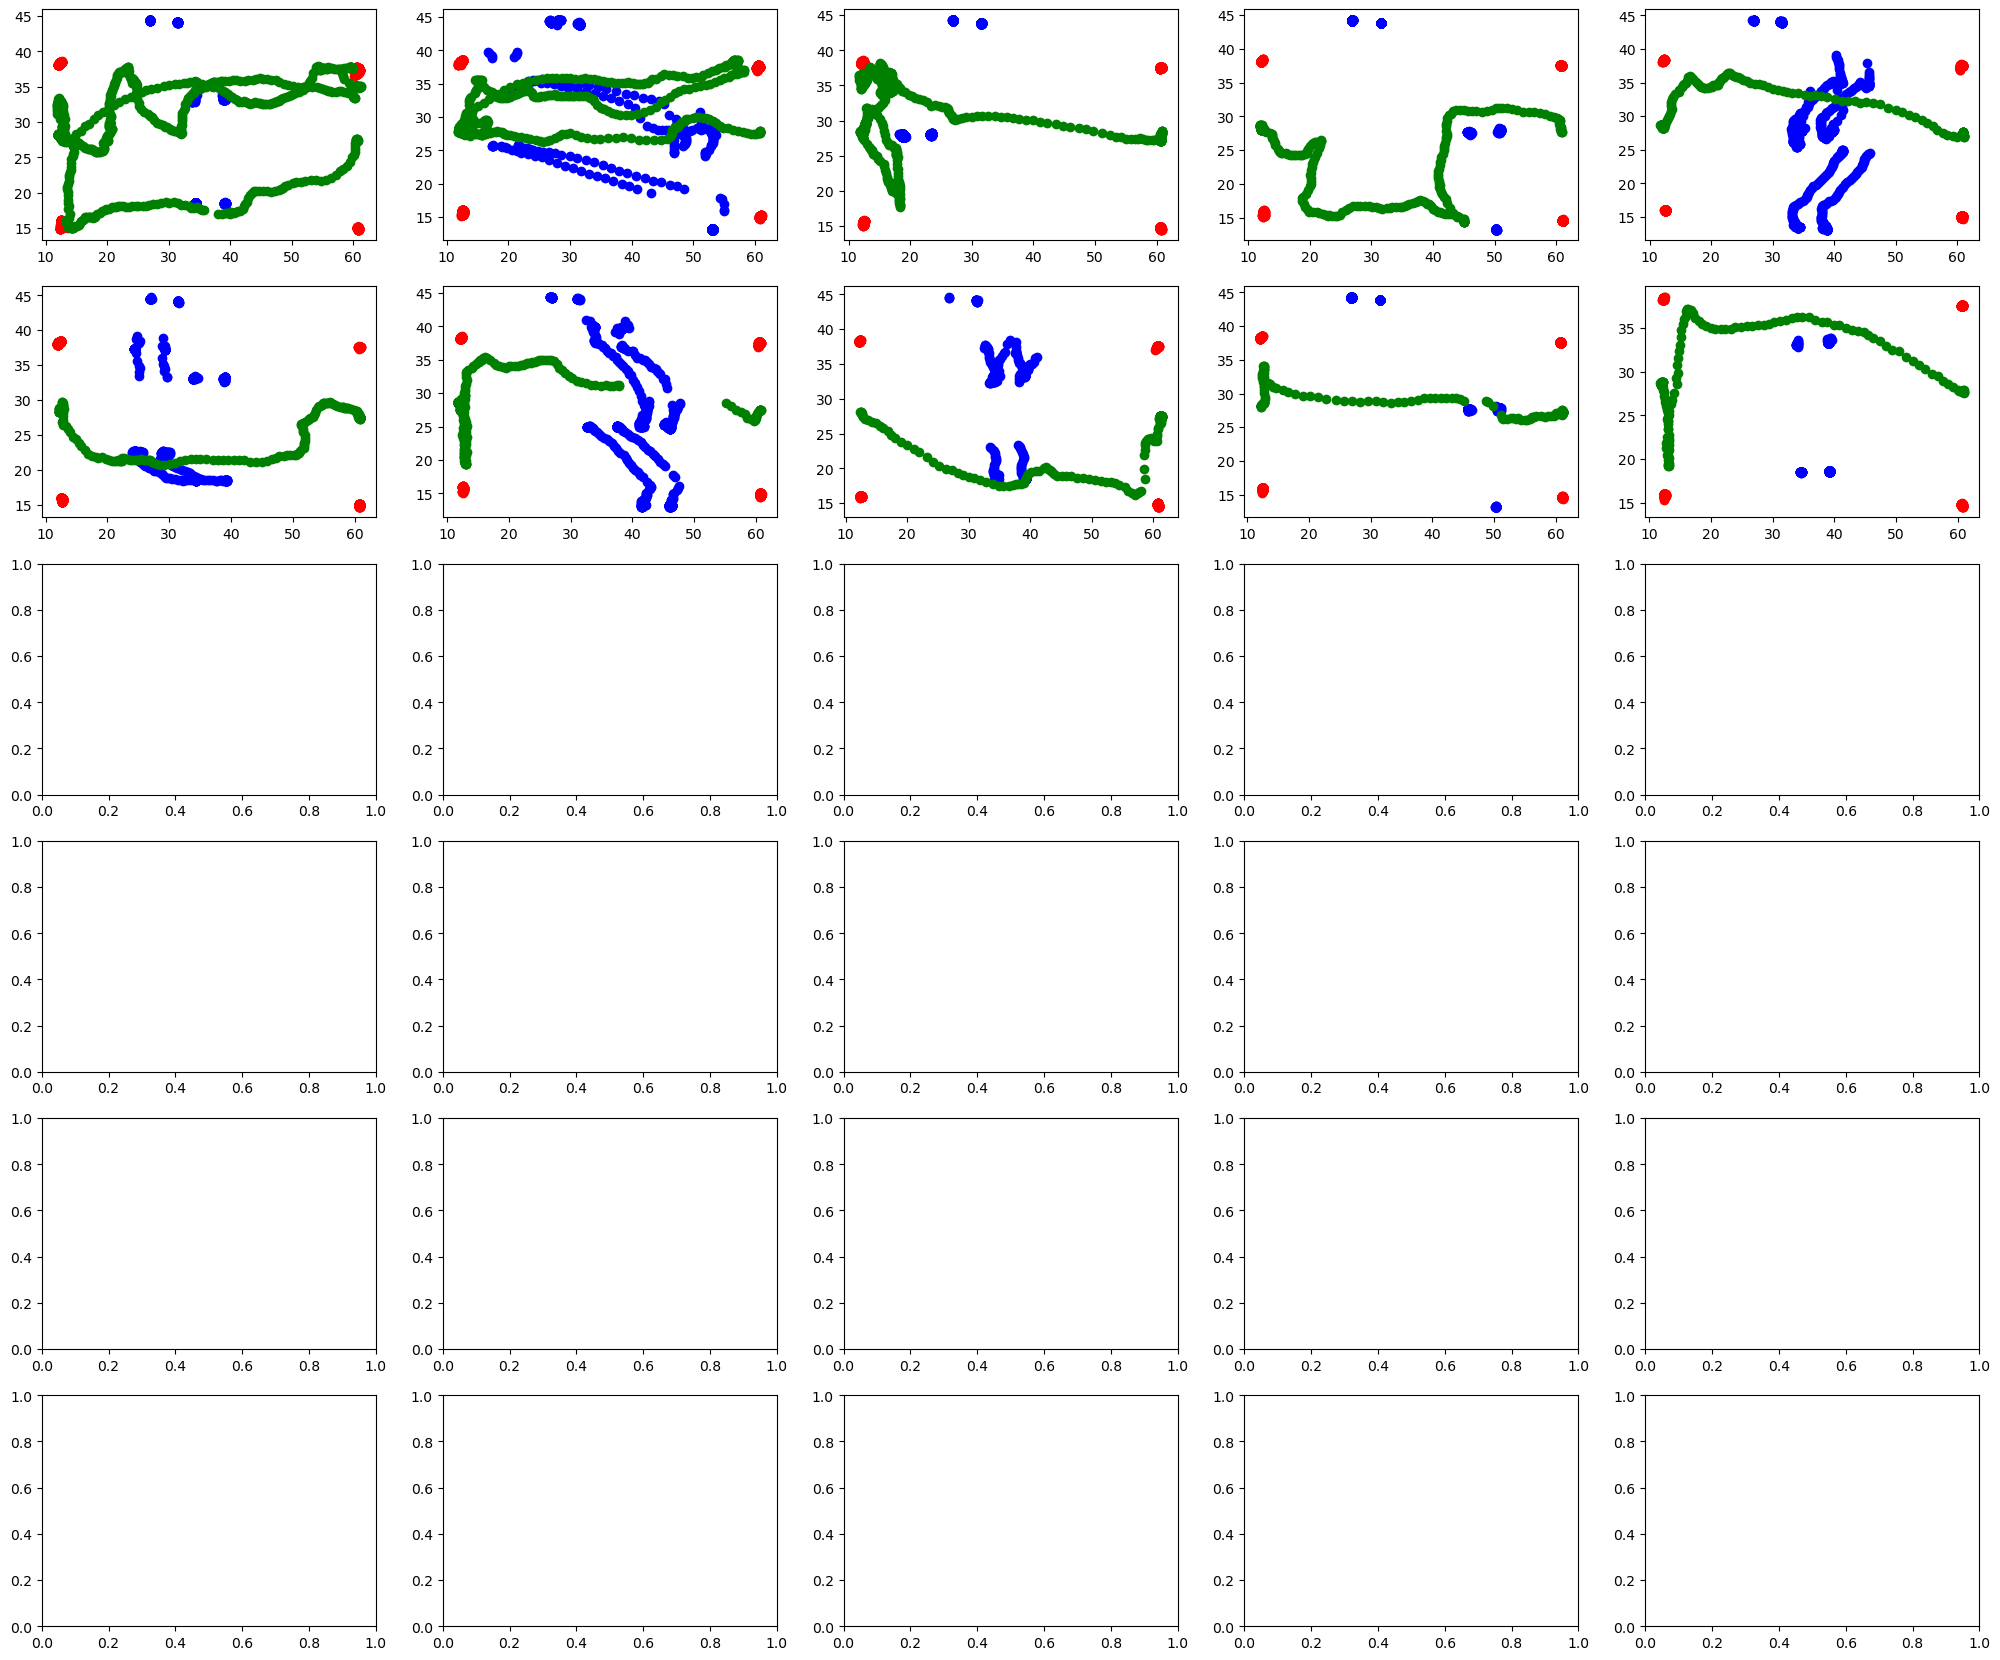

In [111]:
#test=test.reset_index()
plt.subplots(6,5, figsize=(25,21)) 
for ind, row in test.iterrows():
    plt.subplot(6,5,ind +1)
    plt.scatter([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBL_x_cm'], row['arenaBR_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBL_y_cm'], row['arenaBR_y_cm']],color='red')
    plt.scatter([row['obstacleTL_x_cm'], row['obstacleTR_x_cm'], row['obstacleBL_x_cm'], row['obstacleBR_x_cm']],
                [row['obstacleTL_y_cm'], row['obstacleTR_y_cm'], row['obstacleBL_y_cm'], row['obstacleBR_y_cm']],color='blue')
    plt.scatter(row['nose_x_cm'],row['nose_y_cm'],color = 'green')            
                

In [62]:
test[[]]

,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,...,rightportT_x_cm,rightportT_y_cm,rightportB_x_cm,rightportB_y_cm,obstacle_x,obstacle_x_cm,obstacle_x_std,obstacle_y,obstacle_y_cm,obstacle_y_std
0,52,63505.011712,63520.524620,"[63505.019686, 63505.036108, 63505.052774, 635...","[18420, 18421, 18422, 18423, 18424, 18425, 184...","[114.86739349365234, 115.15232849121094, 114.5...","[265.1737365722656, 264.5727233886719, 265.327...","[132.2296142578125, 132.04318237304688, 131.56...","[264.931640625, 264.8052673339844, 265.3870849...","[128.26657104492188, 128.45938110351562, 128.0...",...,"[61.69410873321727, 61.6417876547938, 61.71201...","[26.654649612824908, 26.665233050989386, 26.71...","[60.63674215021022, 60.69263338813762, 60.5604...","[26.534703980294143, 26.601559777427962, 26.63...",34.300393,34.300393,0.764463,37.063611,37.063611,2.159554
1,55,63537.848000,63544.279436,"[63537.864243, 63537.881459, 63537.897433, 635...","[[20390, 20391, 20392, 20393, 20394, 20395, 20...","[570.2232055664062, 569.9671630859375, 570.802...","[258.0972900390625, 258.2244873046875, 258.113...","[557.015869140625, 556.9907836914062, 557.0140...","[246.8000030517578, 247.10902404785156, 247.17...","[550.3031005859375, 550.3987426757812, 550.884...",...,"[61.67984112498076, 61.64324699006548, 61.6718...","[26.79452755010435, 26.78338546015618, 26.7576...","[60.63146508962959, 60.63878782554641, 60.7036...","[26.78355973345313, 26.765006956578464, 26.763...",30.349744,30.349744,4.873094,28.155580,28.155580,5.008681
2,1,63229.835737,63233.886988,"[63229.841587, 63229.857971, 63229.874572, 632...","[[1915, 1916, 1917, 1918, 1919, 1920, 1921, 19...","[569.733154296875, 569.970703125, 569.74591064...","[257.3892822265625, 257.12530517578125, 257.15...","[557.7861328125, 558.2794189453125, 558.036621...","[244.46926879882812, 244.72145080566406, 244.5...","[548.0977783203125, 548.9324951171875, 548.731...",...,"[61.73429257230531, 61.69051902904452, 61.6911...","[26.76478219288707, 26.726091892241147, 26.711...","[60.578727058271355, 60.6297712183321, 60.5898...","[26.75554570814857, 26.709415403572923, 26.709...",30.779012,30.779012,4.425388,29.719773,29.719773,6.136085
3,65,63595.254105,63603.069977,"[63595.267737, 63595.283814, 63595.300723, 635...","[[23833, 23834, 23835, 23836, 23837, 23838, 23...","[569.0010375976562, 569.2662963867188, 569.599...","[259.0525207519531, 259.1631774902344, 259.335...","[558.9092407226562, 558.7410888671875, 558.640...","[246.99937438964844, 247.15557861328125, 247.6...","[550.5185546875, 550.381591796875, 550.6304931...",...,"[61.64352061542892, 61.65834850417152, 61.6454...","[26.755498475198927, 26.758804781673827, 26.77...","[60.60429148508417, 60.5860823686362, 60.64927...","[26.74869204428336, 26.799293191850925, 26.811...",33.086297,33.086297,0.584331,25.102378,25.102378,4.075984
4,5,63253.692748,63258.067686,"[63253.699276, 63253.716531, 63253.73271, 6325...","[[3346, 3347, 3348, 3349, 3350, 3351, 3352, 33...","[567.7761840820312, 567.9352416992188, 567.834...","[260.19580078125, 259.65631103515625, 259.8600...","[555.2067260742188, 554.922119140625, 552.5525...","[248.92391967773438, 249.0541534423828, 250.78...","[554.1431274414062, 554.2879028320312, 555.561...",...,"[61.678440423715536, 61.6587850017751, 61.6080...","[26.857150297716853, 26.823502521625752, 26.78...","[60.30430036340994, 60.27462504125593, 60.2010...","[26.893094572393967, 26.833173875245432, 26.81...",29.960343,29.960343,4.697552,30.066873,30.066873,8.439652


In [92]:
test['trial_vidframes']

0    [[27482, 27483, 27484, 27485, 27486, 27487, 27...
1    [[11132, 11133, 11134, 11135, 11136, 11137, 11...
2    [19815, 19816, 19817, 19818, 19819, 19820, 198...
3    [24302, 24303, 24304, 24305, 24306, 24307, 243...
4    [5053, 5054, 5055, 5056, 5057, 5058, 5059, 506...
5    [[15339, 15340, 15341, 15342, 15343, 15344, 15...
6    [[22674, 22675, 22676, 22677, 22678, 22679, 22...
7    [6628, 6629, 6630, 6631, 6632, 6633, 6634, 663...
8    [[21932, 21933, 21934, 21935, 21936, 21937, 21...
9    [[5457, 5458, 5459, 5460, 5461, 5462, 5463, 54...
Name: trial_vidframes, dtype: object